### Principal Component Analysis (PCA)

Principal component analysis is a tool used for dimensionality reduction. The premise is simple to take data of higher dimensions, and reduce to a 

lower dimension. Often times, in higher dimsional data, it isn't possible to create visual representations of relationships between variables. Through applying PCA, 

it then becomes possible to reduce the dimensions of the data and display variable relationships. 

The proceding section will work through the steps of how a PCA algortithm works using a toy dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

First, we will begin by creating a random distribution of data in a higher dimensional shape (10 variables)

In [3]:
data = np.random.randint(1, 10, 1000).reshape(100, 10)

The first step in PCA implementation is to find the mean of each variable and then subtract the mean from each 

respective row. For example, you find the mean of the first variable by taking the mean of all the values in the 

first column, then subtract the values in the first row (axis=0) by the mean of this first variable. By subtracting 

the means from each of the dimensions, we will then be left with a dataset that has a mean of zero and is considered 

"centered."

In [46]:
data_centered = data - np.mean(data, axis = 0)

Construct the covariance 

In [48]:
data_centered_cov = np.cov(data_centered, rowvar=False)

Find the eigen values and eigen vectors

In [51]:
eigen_values, eigen_vectors = np.linalg.eigh(data_centered_cov)

Take the eigenvalues and eigenvectors and sort them in descending order

In [55]:
index = np.argsort(eigen_values)[::-1]

sorted_values = eigen_values[index]

sorted_vectors = eigen_vectors[:, index]

Determine the amount of components you would like to return from the sorted eigenvalue matrix

In [54]:
components = 3

eigvect_subset = sorted_vectors[:, 0:components]

Return the reduce form by matrix multiplying the transpose of the eigenvector subset and transpose of the normalized dataset, 

then transpose the product

In [56]:
data_pca = (eigvect_subset.T @ data_centered.T).T

data_pca.shape

(100, 3)

In [57]:
def principal_component_analysis(data, components):
    """
    Takes a higher dimension dataset and uses PCA to reduce 
    the data to the desired numnber of dimensions
    
    Parameters
    ----------
    data : np.array(ndim=n, size=m)
        observations that were generated 
        by a model or data provided
    components : int
        number of desired components the 
        given data will be reduced to 
    
    Returns
    -------
    PCA_data : np.array(ndim=n, size=components)
        the dataset with reduced dimensions
    """
    data_centered = data - np.mean(data, axis=0)

    data_centered_cov = np.cov(data_centered, rowvar=False)

    eigen_values, eigen_vectors = np.linalg.eigh(data_centered_cov)

    index = np.argsort(eigen_values)[::-1]
    sorted_values = eigen_values[index]
    sorted_vectors = eigen_vectors[:, index]

    vector_subset = sorted_vectors[:, 0:components]

    PCA_data = (vector_subset.T @ data_centered.T).T

    return PCA_data

In [58]:
# test 

data1 = np.random.randint(1, 10, 50).reshape(10, 5)

ex1 = principal_component_analysis(data1, 3)

ex1.shape

(10, 3)

Building a function that will allow us to count the min necessary amount of components that explain 95% variance 

In [143]:
total_values = sum(eigen_values)

explained_var = [(i/total_values) for i in sorted(eigen_values,
reverse=True)]

sum_explained = np.cumsum(explained_var)

from bisect import bisect_left

def min_components(list, desired_var):
    """
    
    """
    pos = bisect_left(list, desired_var)
    if pos == 0:
        return list[0]
    if pos == len(list):
        return list[-1]
    before = list[pos - 1]
    after = list[pos]
    if after - desired_var < desired_var - before:
        return after 
    else:
        return before

In [144]:
# works in giving me the number closest to the desired var parameter, 
# however, I want this and then the corresponding element index 
# from sum_explained

min_components(sum_explained, .95)


0.9437310313837237

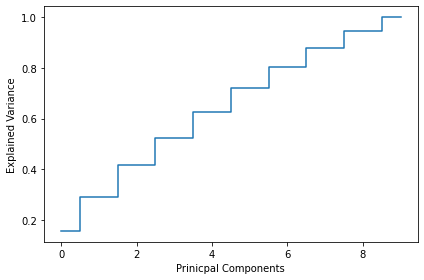

In [67]:
plt.step(range(0, len(sum_explained)), sum_explained,
where='mid', label="Explained Variance")
plt.ylabel("Explained Variance")
plt.xlabel("Prinicpal Components")
plt.tight_layout()
plt.show()